# Initial setup and installations

In [2]:
# install dependences (you will need to restart the runtime after that):
# install rdflib for Graph creation/editing
!pip install rdflib
# install latest version of SpaCy
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
!python -m spacy info
# install SPARQLWrapper
!pip install SPARQLWrapper
# install wandb for vizualization
!pip install wandb

     |████████████████████████████████| 482 kB 17.7 MB/s 
     |████████████████████████████████| 41 kB 364 kB/s 
     |████████████████████████████████| 2.1 MB 22.6 MB/s 
     |████████████████████████████████| 1.1 MB 57.3 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.0/452.0 KB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.3/653.3 KB 42.1 MB/s eta 0:00:00
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installa

#### go to the folder containing your project

In [3]:
cd drive/MyDrive/Rersearch/CreatingKnowledgeGraphsFromText/data/

/content/drive/MyDrive/Rersearch/CreatingKnowledgeGraphsFromText/data


In [ ]:
# inside your project folder you must create the following sub-folders:
# Models  Patterns  Prodigy  RDF  Resources  Spacy  wandb
!ls

corpus	Models	other  Patterns  Prodigy  RDF  Resources  Spacy  wandb


# 2 CONCEPTUAL MODELING

## 2.4.1 Creating SO core concetps using RDFLib

In [ ]:
from pprint import pprint
from rdflib import Graph, Namespace, RDF, URIRef, RDFS

# The primary interface that RDFLib exposes for working with RDF is a Graph.
g = Graph()

# RDFLib graphs are not sorted containers; 
# they have ordinary set operations (e.g. add() to add a triple) plus methods that search triples and return them 
# in arbitrary order.

#Declare the Ontology's Namespace
schema_ns = Namespace('http://scholarly_ontology_schema#')

#create some SO URIs
activity = URIRef(schema_ns.Activity)
method = URIRef(schema_ns.Method)
employs = URIRef(schema_ns.employs)
person = URIRef(schema_ns.Person)
actor = URIRef(schema_ns.Actor)
participatesIn = URIRef(schema_ns.participatesIn)

#declare SO URIs as Classes:
g.add((activity, RDF.type, RDFS.Class))
g.add((method, RDF.type, RDFS.Class))
g.add((actor, RDF.type, RDFS.Class))
g.add((person, RDF.type, RDFS.Class))

#declare SO URIs as Properties
g.add((employs, RDF.type, RDF.Property))
g.add((participatesIn, RDF.type, RDF.Property))

#declare the domain and range of properties
g.add((employs, RDFS.domain, activity))
g.add((employs, RDFS.range, method))
g.add((participatesIn, RDFS.domain, actor))
g.add((participatesIn, RDFS.range, activity))

#declare class hierarchy
g.add((person, RDFS.subClassOf, actor))

#pritty-print the created triples
for stmt in g:
    pprint(stmt)


so_schema_file_name = './RDF/so_schema_sample.rdf'
g.serialize(destination=so_schema_file_name, format='xml')

(rdflib.term.URIRef('http://scholarly_ontology_schema#Person'),
 rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
 rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#Class'))
(rdflib.term.URIRef('http://scholarly_ontology_schema#participatesIn'),
 rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
 rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'))
(rdflib.term.URIRef('http://scholarly_ontology_schema#Activity'),
 rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
 rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#Class'))
(rdflib.term.URIRef('http://scholarly_ontology_schema#participatesIn'),
 rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#domain'),
 rdflib.term.URIRef('http://scholarly_ontology_schema#Actor'))
(rdflib.term.URIRef('http://scholarly_ontology_schema#employs'),
 rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
 rdflib.term.URIRef('http://www.

<Graph identifier=N3b5826b345c04e9a94877a8791d3fcec (<class 'rdflib.graph.Graph'>)>

#3 ANNOTATION

## 3.1.2.1 HTTP-request query through API

In [ ]:
import re, requests, json, srsly
from pprint import pprint

# create a function for querying Springer
def querySpringer(keyword, api_key):
    """inputs: author keywords, API key
        output: list of the article urls"""
    url_list = list()
    spr_url_tk = "http://api.springer.com/metadata/json?p=200&q=keyword:%22" + \
                                    re.sub(' ', '%20', keyword) +"%22&api_key="+ api_key

    myResponse = requests.get(spr_url_tk)

    # For successful API call, response code will be 200 (OK)
    if(myResponse.ok):
        # Loading the response data into a dict variable
        # json.loads takes in only binary or string variables so using content to fetch binary content
        # Loads (Load String) takes a Json file and converts into python data structure 
        # (dict or list, depending on JSON)
        jData = json.loads(myResponse.content)
        # pprint(jData)
        print('an example of a published record: ')
        pprint (jData['records'][0])
        for published_record in jData['records']:
            #pprint(published_record)
            #check if the article is open-access and create it's url
            if published_record['openaccess'] == 'true':
                url_oa = "http://link.springer.com/" + published_record['doi']
                url_list.append(url_oa)
    else:
      # If response code is not ok (200), print the resulting http error code with description
        myResponse.raise_for_status()
    return url_list


api_key =  '98cc5e59957077c43b061835ee669f06' #'your API key' # 
keyword = 'machine learning'
url_list = querySpringer(keyword, api_key)
srsly.write_jsonl("./Resources/Springer_ML_articles_urls.jsonl", url_list) 
print('\n the retrieved url list from Springer:')
pprint(url_list)

an example of a published record: 
{'abstract': 'Given the importance of recognizing indoor occupant’s location '
             'and activity intensity to the control of intelligent homes, '
             'exploring approaches that can detect occupants’ location and '
             'activity types while protecting occupants’ privacy is helpful. '
             'In this study, occupants’ zonal location and activity intensity '
             'recognition models were developed using passive infrared (PIR) '
             'sensors and machine learning algorithms. A PIR sensor array with '
             '15 nodes was employed to monitor indoor occupant’s and cat’s '
             'behavior in a case residential building for 71 days. The output '
             'signals of PIR sensors varied with different locations and '
             'activity intensities. By analyzing the PIR data feature, models '
             'were established using six machine learning algorithms and two '
             'sets of d

## 3.2.2 Corpus Cleaning

###Display the html of an article

In [ ]:
from bs4 import BeautifulSoup
import re
from pprint import pprint
from urllib.request import build_opener, HTTPCookieProcessor

article_url = 'http://link.springer.com/10.1186/s13550-019-0477-x'

opener = build_opener(HTTPCookieProcessor())
response = opener.open(article_url)
# print (response.read())
article_soup = BeautifulSoup(response, 'lxml')
pprint (article_soup)

<!DOCTYPE html>
<html class="no-js" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="pc,mobile" name="applicable-device"/>
<meta content="Yes" name="access"/>
<meta content="We sought to assess the machine learning-based combined diagnostic accuracy of three types of quantitative indices obtained using dopamine transporter single-photon emission computed tomography (DAT SPECT)—specific binding ratio (SBR), putamen-to-caudate ratio (PCR)/fractal dimension (FD), and asymmetry index (AI)—for parkinsonian syndrome (PS). We also aimed to compare the effect of two different types of volume of interest (VOI) settings from commercially available software packages DaTQUANT (Q) and DaTView (V) on diagnostic accuracy. Seventy-one patients with PS and 40 without PS (NPS) were enrolled. Using SPECT images obtained from these patients, three quantitative indices were c

###Display all the classes in order to find which content is usefull

In [ ]:
def springer_find_classes_and_ids(soup):
  """finds all the par tags and displays the class names of their parent divs"""
  class_names = []
  id_names = []
  p_list = soup.find_all('p')
 
  for p in p_list:
    try:
      # iterate over all class values of p.parent div
      for p_c in p.parent['class']:
        if p_c not in class_names:
          class_names.append(p_c)
    except:
      continue
    try:
      # check the id value of the p.parent div
      if p.parent['id'] not in id_names:
        id_names.append((p.parent['id']))
    except:
      continue
  return(class_names, id_names)

p_classes, p_ids = springer_find_classes_and_ids(article_soup)

pprint(p_classes)
pprint(p_ids)

['c-ad__inner',
 '',
 'c-article-metrics-bar__item',
 'c-article-section__content',
 'c-article-section__figure-description',
 'c-abbreviation_list__description',
 'u-mb-24',
 'c-article-references__item',
 'js-c-reading-companion-references-item',
 'c-article-authors-search__item',
 'c-article-authors-search__list-item--right',
 'c-bibliographic-information__column',
 'c-bibliographic-information__list-item',
 'c-bibliographic-information__list-item--doi',
 'c-article-share-box',
 'u-display-none',
 'js-no-share-url-container',
 'js-share-url-container',
 'app-footer__container',
 'c-user-metadata']
['Abs1-content',
 'Sec1-content',
 'Sec2-content',
 'figure-1-desc',
 'Sec8-content',
 'figure-2-desc',
 'figure-3-desc',
 'figure-4-desc',
 'figure-5-desc',
 'Sec12-content',
 'Sec13-content',
 'Ack1-content',
 'author-information-content',
 'ethics-content',
 'rightslink-content']


###Retrieve only the usefull paragraphs based on the "non-content-class" list

In [ ]:
def springer_text_preprocessing(soup):
  c_content = soup.find_all(class_='c-article-section__content', id=re.compile('Sec'))
  p_list = []
  for sec_c in c_content:
    try:
      # print(sec_c['id'])
      pars = sec_c.find_all('p')
      for p in pars:
          # get the remaining cleaned text
          par_content = p.get_text()
          # replace citation brackets with ### symbol
          par_content = re.sub("[\[].*?[\]]", "###", par_content)
          # replace non-ascii whitespace with empty spaces
          par_content = re.sub(r'\s', ' ', par_content)
          #append the clean par text to p_list
          p_list.append(par_content)
    except:
      continue
  return(p_list)

article_par_list = springer_text_preprocessing(article_soup)

with open('./Resources/article_paragraphs.txt', 'w') as f:  
  for p in article_par_list:
    print (p, '\n')
    f.write(p)

Two different types of volume of interest (VOI) settings have been proposed for routine clinical quantification of dopamine transporter single-photon emission computed tomography (DAT SPECT) results using VOI-based analyses. One of the two VOI settings uses a striatal VOI delineated to fit the striatum precisely. Some software packages, such as DaTQUANT (GE Healthcare, Little Chalfont, UK), apply this type of VOI setting ###. This type of VOI setting needs registration to the normalized SPECT image because the shape and position of the striatum vary among individuals. This fixed-size VOI template can be divided to conform with the striatal structure parts, i.e., the caudate, the anterior putamen, and the posterior putamen, to enable the calculation of the putamen-to-caudate ratio (PCR) that represents the ratio between anterior and posterior striatal radioisotope (RI) uptake ###. Tossici-Bolt et al. proposed a large pentagonal prism-shaped VOI, which encompasses a wide area around the 

###introduction to spaCy

At the center of spaCy is the object containing the processing pipeline. We usually call this variable "nlp".

spaCy provides a number of trained pipeline packages you can download using the spacy download command. For example, the "en_core_web_sm" package is a small English pipeline that supports all core capabilities and is trained on web text.

The spacy.load method loads a pipeline package by name and returns an nlp object.

The package provides the binary weights that enable spaCy to make predictions.

It also includes the vocabulary, meta information about the pipeline and the configuration file used to train it. It tells spaCy which language class to use and how to configure the processing pipeline.

For example, to create an English nlp object, you can download "en_core_web_sm" package, import spacy and use the spacy.load method to create the pipeline. You can use the nlp object like a function to analyze text.

It contains all the different components in the pipeline.

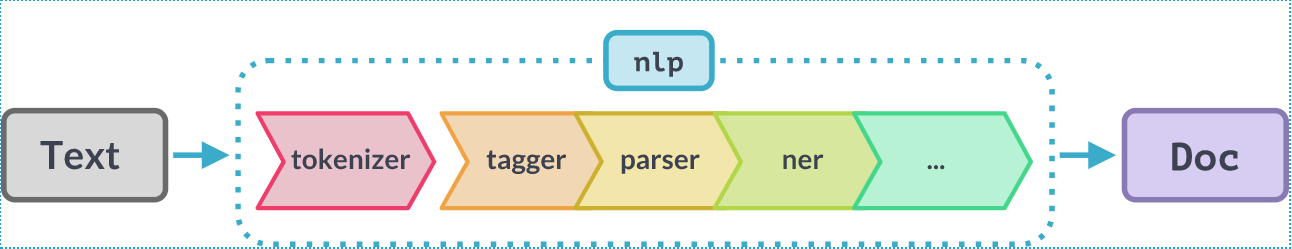

In [ ]:
# $ python -m spacy download en_core_web_sm
import spacy

nlp = spacy.load("en_core_web_sm")

When you process a text with the nlp object, spaCy creates a Doc object – short for "document". The Doc lets you access information about the text in a structured way, and no information is lost.

The Doc behaves like a normal Python sequence by the way and lets you iterate over its tokens, or get a token by its index.

In [ ]:
# Created by processing a string of text with the nlp object
doc = nlp("Hello world!")

# Iterate over tokens in a Doc
for token in doc:
    print(token.text, token.i)

Hello 0
world 1
! 2


Token objects represent the tokens in a document – for example, a word or a punctuation character.

To get a token at a specific position, you can index into the doc.

Token objects also provide various attributes that let you access more information about the tokens. For example, the .text attribute returns the verbatim token text.

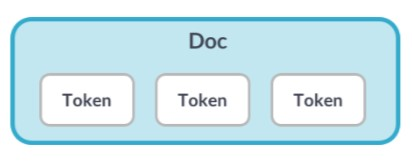

In [ ]:
doc = nlp("We used PCA for the experiment")

# Index into the Doc to get a single Token
token = doc[2]

# Get the token text via the .text attribute
print(token.text, token.tag_, token.dep_)

PCA NNP dobj


A Span object is a slice of the document consisting of one or more tokens. It's only a view of the Doc and doesn't contain any data itself.

To create a span, you can use Python's slice notation. For example, 1:3 will create a slice starting from the token at position 1, up to – but not including! – the token at position 3.

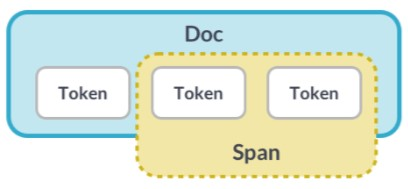

In [ ]:
doc = nlp("We used PCA for the experiment")

# A slice from the Doc is a Span object
span = doc[1:3]

# Get the span text via the .text attribute
print(span.text)

used PCA


Here you can see some of the available token attributes:

i is the index of the token within the parent document.

text returns the token text.

is_alpha, is_punct and like_num return boolean values indicating whether the token consists of alphabetic characters, whether it's punctuation or whether it resembles a number. For example, a token "10" – one, zero – or the word "ten" – T, E, N.

These attributes are also called lexical attributes: they refer to the entry in the vocabulary and don't depend on the token's context.

In [ ]:
doc = nlp("It costs $5.")
print("Index:   ", [token.i for token in doc])
print("Text:    ", [token.text for token in doc])

print("is_alpha:", [token.is_alpha for token in doc])
print("is_punct:", [token.is_punct for token in doc])
print("like_num:", [token.like_num for token in doc])

Index:    [0, 1, 2, 3, 4]
Text:     ['It', 'costs', '$', '5', '.']
is_alpha: [True, True, False, False, False]
is_punct: [False, False, False, False, True]
like_num: [False, False, False, True, False]


###Create a custom spaCy Tokenizer

In [ ]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.util import compile_infix_regex

nlp = spacy.load("en_core_web_sm")

def custom_tokenizer(nlp):
    inf = list(nlp.Defaults.infixes)               # Default infixes
    inf.remove(r"(?<=[0-9])[+\-\*^](?=[0-9-])")    # Remove the generic op between numbers or between a number and a -
    inf = tuple(inf)                               # Convert inf to tuple
    infixes = inf + tuple([r"(?<=[0-9])[+*^](?=[0-9-])", r"(?<=[0-9])-(?=-)"])  # Add the removed rule after subtracting (?<=[0-9])-(?=[0-9]) pattern
    infixes = [x for x in infixes if '-|–|—|--|---|——|~' not in x] # Remove - between letters rule
    infix_re = compile_infix_regex(infixes)

    return Tokenizer(nlp.vocab, prefix_search=nlp.tokenizer.prefix_search,
                                suffix_search=nlp.tokenizer.suffix_search,
                                infix_finditer=infix_re.finditer,
                                token_match=nlp.tokenizer.token_match,
                                rules=nlp.Defaults.tokenizer_exceptions)
    
text = "We applied Kernel-PCA into the data to achieve sores inbeteween 30-50."
doc = nlp(text)
print('BEFORE: ', [token.text for token in doc])
nlp.tokenizer = custom_tokenizer(nlp)
doc = nlp(text)
print('AFTER: ', [token.text for token in doc]) 

BEFORE:  ['We', 'applied', 'Kernel', '-', 'PCA', 'into', 'the', 'data', 'to', 'achieve', 'sores', 'inbeteween', '30', '-', '50', '.']
AFTER:  ['We', 'applied', 'Kernel-PCA', 'into', 'the', 'data', 'to', 'achieve', 'sores', 'inbeteween', '30-50', '.']


### Create a custom spaCy sentence segmenter

In [ ]:
from spacy.language import Language
import spacy

text = "I came; I saw; I conquered."

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
print("Before:", [sent.text for sent in doc.sents])

@Language.component("set_custom_boundaries")
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        if token.text == ";":
            doc[token.i + 1].is_sent_start = True
    return doc

nlp.add_pipe("set_custom_boundaries", before="parser")
doc = nlp(text)
print("After:", [sent.text for sent in doc.sents])

Before: ['I came; I saw; I conquered.']
After: ['I came;', 'I saw;', 'I conquered.']


### Load the txt and preform Tokenization & Sentence Segmantation

In [ ]:
import spacy

with open('./Resources/article_paragraphs.txt') as f:
    article_par_list = f.readlines()

# load spaCy for NLP functions
nlp = spacy.load('en_core_web_sm')
nlp.tokenizer = custom_tokenizer(nlp)
#add custom_sentencizer to the pipeline after tokenization, but before the dependency parsing.
nlp.add_pipe("set_custom_boundaries", before="parser")  # Insert before the parser

for p in article_par_list:
  doc = nlp(p)
  for s in list(doc.sents)[:3]:
      print ('SENT:', s)
      print('TOKENS:', [t.text for t in s])


SENT: Two different types of volume of interest (VOI) settings have been proposed for routine clinical quantification of dopamine transporter single-photon emission computed tomography (DAT SPECT) results using VOI-based analyses.
TOKENS: ['Two', 'different', 'types', 'of', 'volume', 'of', 'interest', '(', 'VOI', ')', 'settings', 'have', 'been', 'proposed', 'for', 'routine', 'clinical', 'quantification', 'of', 'dopamine', 'transporter', 'single-photon', 'emission', 'computed', 'tomography', '(', 'DAT', 'SPECT', ')', 'results', 'using', 'VOI-based', 'analyses', '.']
SENT: One of the two VOI settings uses a striatal VOI delineated to fit the striatum precisely.
TOKENS: ['One', 'of', 'the', 'two', 'VOI', 'settings', 'uses', 'a', 'striatal', 'VOI', 'delineated', 'to', 'fit', 'the', 'striatum', 'precisely', '.']
SENT: Some software packages, such as DaTQUANT (GE Healthcare, Little Chalfont, UK), apply this type of VOI setting ###.
TOKENS: ['Some', 'software', 'packages', ',', 'such', 'as', 

## 3.2.3 Distance Supervision

###Query Dbpedia SPARQL Endpoint for categories containing a specified keyword (e.g. algorithm)

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON
from pprint import pprint
import re, srsly


def query_dbpedia_categories(keyword):
    """input: search keyword
       output: list of all dbpedia categories containing the keyword"""
    
    # initialize the SPARQLWrapper with DBpedia endpoint
    sparql = SPARQLWrapper("http://dbpedia.org/sparql")
    sparql.setReturnFormat(JSON)
    
    # this wont work due to the size of the data and the FILTER line which kills the performance 
    # PREFIX dct: <http://purl.org/dc/terms/>
    # SELECT DISTINCT ?s
    # WHERE { ?s ^dct:subject ?x. 
    # FILTER( regex(?s, "classification", "i") || regex(?s, "algorithms", "i") ) }

    # Virtuoso wont give out more than 10000 instances per query
    # we will "trick" it to give us all by ordering the results alphabeticaly 
    # and setting a limit with an additional offset that increases every time we run the query
    keyword_results = []
    offset = 0
    sparql.setQuery("""
            PREFIX dct: <http://purl.org/dc/terms/>
            SELECT DISTINCT ?s
            WHERE { ?s ^dct:subject ?x }order by ?name limit 9999 offset """+ str(offset))
    results = sparql.query().convert()

    while True:
        sparql.setQuery("""
            PREFIX dct: <http://purl.org/dc/terms/>
            SELECT DISTINCT ?s
            WHERE { ?s ^dct:subject ?x }order by ?name limit 9999 offset """+ str(offset))
        results = sparql.query().convert()

        # to check out how the results from DBpedia are formated see SamplePrintOuts/3.2.3DBpedia_results.txt
        
        #create a list with the retrieved instances
        uri_results = [result["s"]["value"] for result in results["results"]["bindings"]]
        #check if the returned list has any instances
        if uri_results:
            for uri in uri_results:
                if keyword in uri:
                    # if our keyword is in the uri append it to the results list 
                    keyword_results.append(uri)
                    print(uri)
            # increase the offset by 9999 in order to retrieve the next 9999 results
            offset += 9999
        else:
            #the query didn't return anything which means we got all the instances
            break
    return keyword_results


total_results = query_dbpedia_categories('methods')
# write the URIs into a jsonl file
srsly.write_jsonl("./Resources/DBPedia_methods_URIs.jsonl", total_results) 
pprint(total_results[55:65])

http://dbpedia.org/resource/Category:Apportionment_methods
http://dbpedia.org/resource/Category:Educational_evaluation_methods
http://dbpedia.org/resource/Category:Educational_psychology_research_methods
http://dbpedia.org/resource/Category:Formal_methods_organizations
http://dbpedia.org/resource/Category:Formal_methods_terminology
http://dbpedia.org/resource/Category:Simultaneous_equation_methods_(econometrics)
http://dbpedia.org/resource/Category:Topological_methods_of_algebraic_geometry
http://dbpedia.org/resource/Category:Formal_methods_tools
http://dbpedia.org/resource/Category:Preservation_methods
http://dbpedia.org/resource/Category:Relaxation_(iterative_methods)
http://dbpedia.org/resource/Category:Cleaning_methods
http://dbpedia.org/resource/Category:Estimation_methods
http://dbpedia.org/resource/Category:Problem_structuring_methods
http://dbpedia.org/resource/Category:Evaluation_methods
http://dbpedia.org/resource/Category:Formal_methods_people
http://dbpedia.org/resource/Cat

###For each category retrieve all the DBpedia objects

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON
from pprint import pprint
import re, srsly

# For each category retrieve all the DBpedia objects:
def query_dbpedia_objects(DBpedia_subject):
    """input: the dbpedia_subject uri for the corresponding category 
       output: URIs from the dbpedia objects that have the input as subject"""
    
    # initialize the SPARQLWrapper with DBpedia endpoint
    sparql = SPARQLWrapper("http://dbpedia.org/sparql")
    sparql.setReturnFormat(JSON)

    # query DBpedia for all the DB_objects that have DBpedia_subject as category
    sparql.setQuery("""
        PREFIX dct: <http://purl.org/dc/terms/>
        SELECT ?s
        WHERE { <""" + DBpedia_subject + """> ^dct:subject ?s }
        """)
    results = sparql.query().convert()
    
    # to check out how the results from DBpedia are formated see SamplePrintOuts/2.4.1.1DBpedia_results.txt

    # create a list with all the db_object URIs 
    objects_list = [result["s"]["value"] for result in results["results"]["bindings"]]
    return(objects_list)

DBpedia_objects = []
DBpedia_subject = 'http://dbpedia.org/resource/Category:Machine_learning_algorithms'
dbpedia_subjects = srsly.read_jsonl("./Resources/DBPedia_Algorithms_URIs.jsonl")
for DBpedia_subject in dbpedia_subjects:
  for db_obj in query_dbpedia_objects(DBpedia_subject):
    DBpedia_objects.append(db_obj)

# For each DBpedia object:
# Retrieve all the alternate labels
# perform dublicate check

def find_dbpedia_object_labels(ne_uris):
    """input: a list of DBpedia uris with the DBpedia objects
       output: a list with all the labels (primary and alternate) for each object"""
    
    # initialize the SPARQLWrapper with DBpedia endpoint
    sparql = SPARQLWrapper("http://dbpedia.org/sparql")
    sparql.setReturnFormat(JSON)
    #create a list where we will store all the NE labels
    NE_list = list()
    # create a list with all the alternate_names for DBpedia_objects
    alt_ne_uris = list()
    
    # for each ne_uri query DBpedia for alternate names (uris that redirect to it)
    for uri in ne_uris[:5]:
        sparql.setQuery("""
        PREFIX dbo: <http://dbpedia.org/ontology/>
        SELECT ?s
        WHERE { <""" + uri + """> ^dbo:wikiPageRedirects ?s }
        """)

        results = sparql.query().convert()
        for result in results["results"]["bindings"]:
            # check for duplicates and then add the new uris to the alt_ne_uris list
            if result["s"]["value"] not in alt_ne_uris: alt_ne_uris.append(result["s"]["value"]) 

    # concatenate both ne_lists and for each of their elemets create the ne label
    for ne_uri in ne_uris+alt_ne_uris:
        ne = re.sub('_',' ',re.sub('http.*/','',ne_uri))
        # check for duplicates and then add the new label to the NE_list
        if ne not in NE_list: NE_list.append(ne)
            
    return(NE_list)

NE_list = find_dbpedia_object_labels(DBpedia_objects)
srsly.write_jsonl("./Resources/DBPedia_Algorithms_labes.jsonl", NE_list)
print('NE labels: ')
pprint(NE_list)

NE labels: 
['Trabucco',
 'Fishing basket',
 'Giller (fishing)',
 'Salambáw',
 'Haaf net fishing',
 'Chinese fishing nets',
 'Bowfishing',
 'Trout tickling',
 'Eel buck',
 'Remote control fishing',
 'Tangle net',
 'Electric pulse fishing',
 'Gillnetting',
 'Gathering seafood by hand',
 'Urban fishing',
 'Trolling (fishing)',
 'Casting (fishing)',
 'Spearfishing',
 'Ice fishing',
 'Longline fishing',
 'Trawling',
 'Basnig',
 'Surf fishing',
 'Shrimp baiting',
 'Rig (fishing)',
 'Cormorant fishing',
 'Bank fishing',
 'Fishing techniques',
 'Deadsticking',
 'Tag and release',
 'Centerpin fishing',
 'Skishing',
 'Noodling',
 'Catch and release',
 'Pearl hunting',
 'Seine fishing',
 'Drift netting',
 'Fish trap',
 'Lampuki netting',
 'Cormorant fishing on the Nagara River',
 'Electrofishing',
 'Gigging',
 'Spin fishing',
 'Ayu fishing',
 'Lave net',
 'Green-sticking',
 'Bottom fishing',
 'Recreational boat fishing',
 'Jug fishing',
 'Muro-ami',
 'Bait fish',
 'Blast fishing',
 'Flosser',
 '

###Use SpaCy's Phrase Matcher

In [ ]:
import spacy, srsly
from spacy.matcher import PhraseMatcher

nlp = spacy.load('en_core_web_sm')
# initialize spaCy's PhraseMatcher with the english model
# add the LOWER attribute to match without case sensitive
matcher = PhraseMatcher(nlp.vocab, attr="LOWER") 

# use the NE_list we created from DBpedia - sample is used here
# with open('CleanMethodNames.txt') as f:
#     NE_list = f.read().splitlines()
NE_list = srsly.read_jsonl('./Resources/ML_Method_Names.jsonl')
# NE_list = ['Random Forests', 'SVM', 'Kernel PCA']

# Only run nlp.make_doc to create spaCy docs for each NE term in the list 
# this way is much more efficient than creating a RE pattern for each term although
# it is using only the nlp.tokenizer.pipe from spaCy 
# all the possible term alterations have to be taken into account
patterns = [nlp.make_doc(text) for text in NE_list]

# print(patterns)
matcher.add('METHODS_list', patterns)

text = "we used SVM for the classification.\
In order to evaluate the experiment, we calculated the P, R and F1 scores.\
Random Forests yielded the highest performance.\
For the stylistic analysis we employed the PCA method.\
Svm can be used for classification.\
SVM is a machine learning method. Kernel PCA is also one."


train_data = []

doc = nlp(text)    
matches =  matcher(doc)
# print(matches)
matches = [doc[start:end] for match_id, start, end in matches]
matches = spacy.util.filter_spans(matches)
# print(matches)
spans = [{"start": span.start_char, "end": span.end_char, "label": "METHOD"} for span in matches]
train_data.append({"text": doc.text, "spans": spans})
pprint(train_data)
# The annotated dataset can be exported into jsonl for visual inspection with Prodigy
srsly.write_jsonl("./Prodigy/sample_methods_Dataset.jsonl", train_data) 

[{'spans': [{'end': 11, 'label': 'METHOD', 'start': 8},
            {'end': 123, 'label': 'METHOD', 'start': 109},
            {'end': 202, 'label': 'METHOD', 'start': 199},
            {'end': 213, 'label': 'METHOD', 'start': 210},
            {'end': 248, 'label': 'METHOD', 'start': 245},
            {'end': 289, 'label': 'METHOD', 'start': 279}],
  'text': 'we used SVM for the classification.In order to evaluate the '
          'experiment, we calculated the P, R and F1 scores.Random Forests '
          'yielded the highest performance.For the stylistic analysis we '
          'employed the PCA method.Svm can be used for classification.SVM is a '
          'machine learning method. Kernel PCA is also one.'}]


## 3.6 Annotating SO Entities with Prodigy

###Transform text into jsonl format:

In [ ]:
import srsly, spacy

text = "we used SVM for the classification.\
In order to evaluate the experiment, we calculated the P, R and F1 scores.\
Random Forests yielded the highest performance.\
For the stylistic analysis we employed the PCA method.\
Svm can be used for classification.\
SVM is a machine learning method. Kernel PCA is also one. \
we used PCA for the classification and then calculated the results. \
We performed linguistic analysis by clustering the individual lyrical characteristics. \
K-means is a machine learning method used in NLP. \
SVM can be used for text classification as well as NER."

nlp = spacy.load('en_core_web_sm')
doc = nlp(text) 
# prodigy format for text requires a list of dictionaries -one for each doc-:
prodigy_text = [{"text":sent.text} for sent in doc.sents]
# export into jsonl format 
srsly.write_jsonl("./Prodigy/sample_text_for_annotation.jsonl", prodigy_text) 

###Use Prodigy for manual annotation

In [ ]:
# We can use the clean text (transformed into jsonl) directly in Prodigy for manual annotation (On Prodigy Evironment):
python -m prodigy ner.manual methods_sample_dataset en_core_web_sm ./Dataset/sample_text_for_annotation.jsonl --label METHOD

###Export Patterns into jsonl format



In [ ]:
import srsly
NE_list = ['Random Forests', 'SVM', 'Kernel PCA']

def spacy_patterns_from_list(NE_list, label):
  """create a list of spaCy patterns based on the terms of NE list"""
  patterns =[]
  for term in NE_list:
    patterns.append({"label": label, "pattern": term})
  return(patterns)
  
# export the patterns into jsonl format.
srsly.write_jsonl('./Patterns/sample_method_patterns.jsonl', spacy_patterns_from_list(NE_list, "METHOD"))

###Use patterns with Prodigy’s ner.manual recipe

In [ ]:
# The patterns for matching methods can be used directly into Prodigy's Language model (On Prodigy Evironment):
python -m prodigy ner.manual methods_sample_dataset en_core_web_sm ./Dataset/sample_text_for_annotation.jsonl --patterns ./Patterns/sample_method_patterns.jsonl --label METHOD

# 4 TRAINING

## 4.5.1 Training a NER with SpaCy

###Train using Prodigy's spaCy wrapper

In [ ]:
#on Prodigy environment:
#python -m prodigy "recipe name" "path-to-output-dir" --ner "dataset name", eval:"evaluation dataset"
python -m prodigy train ./models --ner methods_sample_dataset, eval:ner_methods

###Export Prodigy dataset for spaCy

In [ ]:
#on Prodigy environment:
#python -m prodigy "recipe name" "path-to-output-dir" --ner "dataset name" --eval-split "percentage to hold back for developement"
python -m prodigy data-to-spacy ./Exports --ner methods_sample_dataset --eval-split 0.3

### Create a config.cfg file for spaCy NER

Use the widget from here:
https://spacy.io/usage/training in order to create a base_config.cfg which you can download and initialize

In [ ]:
!python -m spacy init fill-config ./Models/base_config.cfg ./Models/config.cfg

✔ Auto-filled config with all values
✔ Saved config
Models/config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


###Train using spaCy NER

In [ ]:
!python -m spacy train ./Models/config.cfg --paths.train ./Spacy/train.spacy --paths.dev ./Spacy/dev.spacy --output ./Models

ℹ Saving to output directory: Models
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2022-03-15 11:59:47,513] [INFO] Set up nlp object from config
[2022-03-15 11:59:47,526] [INFO] Pipeline: ['tok2vec', 'ner']
[2022-03-15 11:59:47,531] [INFO] Created vocabulary
[2022-03-15 11:59:47,533] [INFO] Finished initializing nlp object
[2022-03-15 11:59:48,559] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     22.50    0.00    0.00    0.00    0.00
  1     200        166.53   1453.28   51.88   55.36   48.82    0.52
  4     400        154.18    335.26   59.23   65.09   54.33    0.59
  7     600        119.16    152.86   51.38

###Load the trained model and use it on new text


In [ ]:
import spacy, srsly

nlp = spacy.load('en_core_web_sm')

trained_nlp = spacy.load('Models/model-best')

sample_text = "we used PCA for the classification and then calculated the results. \
We performed linguistic analysis by clustering the individual lyrical characteristics. \
K-means is a machine learning method used in NLP. \
SVM can be used for text classification as well as NER."

doc = nlp(sample_text)

# serialize the results into jsonl
data =[]
for sent in doc.sents:
  print(sent.text)
  sent_nlp = trained_nlp(sent.text)
  for ent in sent_nlp.ents:
    print (ent.text, ent.label_, ent.start, ent.end, ent.start_char, ent.end_char)
    spans = [{"start": span.start_char, "end": span.end_char, "label": "METHOD"} for span in sent_nlp.ents]
  data.append({"text": sent.text, "spans": spans})

srsly.write_jsonl('./Spacy/eval_spacy_preds.jsonl', data)

we used PCA for the classification and then calculated the results.
PCA METHOD 2 3 8 11
We performed linguistic analysis by clustering the individual lyrical characteristics.
K-means is a machine learning method used in NLP.
NLP METHOD 10 11 45 48
SVM can be used for text classification as well as NER.
SVM METHOD 0 1 0 3


# 5 EVALUATION

## 5.3 Evaluation: Use case NER

### Export the gold-standard from Prodigy into jsonl format

In [ ]:
# on Prodigy environment:
python -m prodigy db-out "database-name" "path-to-dataset/dataset_name.jsonl"

### Compare the gold standard with the NER output and create the Confusion Matrix

In [ ]:
import srsly, pprint, spacy
from spacy.training import offsets_to_biluo_tags
from sklearn.metrics import confusion_matrix

pred_docs = list(srsly.read_jsonl('./Spacy/eval_spacy_preds.jsonl'))
gold_docs = list(srsly.read_jsonl('./Spacy/eval_gs.jsonl'))

nlp = spacy.load("en_core_web_sm")

from spacy.training import offsets_to_biluo_tags

def get_cleaned_label(label: str):
    if "-" in label:
        return 1
    else:
        return label
    
def create_total_target_vector(docs):
    target_vector = []
    for doc in docs:
        # print (doc)
        # print (doc['spans'])
        new = nlp.make_doc(doc['text'])
        entities = [(s['start'], s['end'], s['label']) for s in doc["spans"]]
        # print(entities)
        bilou_entities = offsets_to_biluo_tags(new, entities)
        # print(bilou_entities)
        final = []
        for item in bilou_entities:
            final.append(get_cleaned_label(item))
        print(final, len(final))
        target_vector.extend(final)
    return target_vector

print('y_pred:')
y_pred = create_total_target_vector(pred_docs)
print('y_gold:')
y_true = create_total_target_vector(gold_docs)

confusion_matrix(y_true, y_pred)

y_pred:
['O', 'O', 1, 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] 12
['O', 1, 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] 11
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 1, 'O'] 12
[1, 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] 12
y_gold:
['O', 'O', 1, 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] 12
['O', 'O', 1, 1, 'O', 'O', 'O', 'O', 'O', 'O', 'O'] 11
[1, 1, 1, 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] 12
[1, 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] 12


/usr/local/lib/python3.7/dist-packages/spacy/training/iob_utils.py:144: UserWarning: [W030] Some entities could not be aligned in the text "We performed linguistic analysis by clustering the..." with entities "[(8, 11, 'METHOD')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


array([[ 2,  5],
       [ 2, 38]])

###Plot the Confusion Matrix for visual inspection

(array([[ 2,  5],
        [ 2, 38]]),
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>)

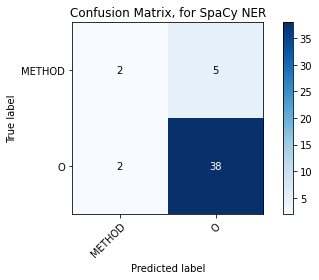

In [ ]:
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import numpy

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    title = 'Confusion Matrix, for SpaCy NER'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]

    fig, ax = pyplot.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=numpy.arange(cm.shape[1]),
           yticks=numpy.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm, ax, pyplot

dataset_labels = ['METHOD', 'O']
plot_confusion_matrix(y_true, y_pred, dataset_labels, normalize=False)

###Use the spaCy.evaluate method

In [ ]:
!python -m spacy evaluate ./Models/model-last ./Spacy/eval.spacy --output ./Spacy/eval_results.json

ℹ Using CPU

================================== Results ==================================

TOK     100.00
NER P   30.77 
NER R   12.90 
NER F   18.18 
SPEED   19353 


=============================== NER (per type) ===============================

               P       R       F
GOAL        0.00    0.00    0.00
METHOD     30.77   72.73   43.24
ACTIVITY    0.00    0.00    0.00

✔ Saved results to Spacy/eval_results.json


#6 OUTPUT

## 6.3 Visualizations


###Visualize token's attributes using displaCy:

In [5]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

# for long text we can split into sentences first:
text = "We downloaded the dataset. Then we used PCA for clustering."
doc = nlp(text)
sentence_spans = list(doc.sents)
# displacy.render(sentence_spans, style="dep")
displacy.render(sentence_spans, jupyter=True, style="dep", options = {'distance':110, 'fine_grained':True})

###Visualize model's training performance using Weights & Biases

In [ ]:
# create an a ccount to wandb (https://wandb.ai/) and login win command prompt:
!wandb login

wandb: Currently logged in as: vpertsas (use `wandb login --relogin` to force relogin)


In [ ]:
# change the config.cfg by copying replacing the loggers section with the code below:
[training.logger]
@loggers = "spacy.WandbLogger.v3"
project_name = "my_spacy_project"
remove_config_values = ["paths.train", "paths.dev", "corpora.train.path", "corpora.dev.path"]
log_dataset_dir = "./corpus"
model_log_interval = 1000

In [4]:
# run the train command as usual:
!python -m spacy train ./Models/config_wndb.cfg --output ./Models/en_core_web_sm --paths.train ./Spacy/METHOD_810_train.spacy --paths.dev ./Spacy/METHOD_90_dev.spacy

✔ Created output directory: Models/en_core_web_sm
ℹ Saving to output directory: Models/en_core_web_sm
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2022-03-22 10:54:55,941] [INFO] Set up nlp object from config
[2022-03-22 10:54:56,600] [INFO] Pipeline: ['tok2vec', 'ner']
[2022-03-22 10:54:56,610] [INFO] Created vocabulary
[2022-03-22 10:54:56,612] [INFO] Finished initializing nlp object
[2022-03-22 10:54:58,328] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit en

###Visualize the output of a NER model using displaCy

In [ ]:
import spacy
from spacy import displacy

trained_nlp = spacy.load('./Models/model-best')
text = 'We downloaded the dataset from DBpedia and then we used PCA for the classification.'
doc = trained_nlp(text)

# visualize the output of the trained NER with displacy
displacy.render(doc, jupyter=True, style="ent", options = {'distance':140})

## 6.4.1 Metadata Extraction

In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import re, requests, json
from pprint import pprint
from urllib.request import build_opener, HTTPCookieProcessor


def retrieveORCID(first_name, last_name):
    """function that retrieves ORCID relevant information
    inputs: first_name, last_name
    outputs: orcid_record"""
    
    orcid = 'none'
    headers = {'Content-Type': 'application/orcid+json','Authorization': '7d3741e4-e339-47c6-ad10-963d4767bc23'} #your ORCID API-key
    query = 'https://pub.orcid.org/v3.0/search/?q=family-name:'+last_name+'+AND+given-names:'+first_name
    resp = requests.get(query, headers=headers)
    results = resp.json()
    # check whether we have a match
    if results['num-found'] == 1:     
        #in case of a singel match retrieve the orcid id
        orcid = results['result'][0]['orcid-identifier']['path']
    return orcid


def retrieveSpringerMetadata(article_soup):
    """find html/xml tags that are relevant to authors 
    inputs: the article parsed html/xml code from BeautifulSoup, 
    output: the article_metadata dic with a list containing all the info for each author:  
    [first_name, last_name, [affiliation_list], email, bio, orcid]"""
    
    #create a dictionary to sore article's metadata
    article_metadata = {}
    article_metadata['authorKeywords'] = list()
    article_metadata['authors'] = list()
    
    #search for author tags 
    for meta in article_soup.find_all('meta'):
        # search for the 'meta' html tags that indicate the metadata
        # to see the html code of the article checkout SamplePrintOuts/2.3.1Soup_for_Springer_Article.html
        if meta.get('name') == 'citation_author':
            last_name = meta.get('content').rsplit(' ', 1)[0]
            first_name = meta.get('content').rsplit(' ', 1)[1]
            #create a list to store the author's affiliations
            affiliation_list = list()
            email = 'none'
            orcid = 'none'
            # parse the next siblings until the next citation_author 
            for i in meta.next_siblings:
                # the next sibling of a tag is usually a new line character (or a comma, etc.), NOT the next tag!
                if i != '\n':
                    if i.get('name') == 'citation_author_institution':
                        affiliation_list.append(i.get('content'))
                    elif i.get('name') == 'citation_author_email':
                        email = i.get('content')
                    else:
                        break

            orcid = retrieveORCID(first_name, last_name)
            author_info = {
                'first_name':first_name,
                'last_name':last_name,
                'affiliations':affiliation_list,
                'emai':email,
                'orcid': orcid
            }            
            article_metadata['authors'].append(author_info)
            
    #retrieve article author keywords
    for span in article_soup.find_all(class_ = "c-article__sub-heading"):
      if span.get_text() == 'Keywords':
        article_metadata['authorKeywords']=[k.get_text() for k in span.next_sibling.find_all('span')]
        
    #retrieve article publishing info
    for meta in article_soup.find_all('meta'):
        if meta.get('name') == "citation_title":
            article_metadata['articleTitle'] = meta.get('content')
        elif meta.get('name') == "dc.identifier":
            article_metadata['articleID'] = meta.get('content')
        elif meta.get('name') == "citation_journal_title":
            article_metadata['journal'] = meta.get('content')
        elif meta.get('name') == "citation_volume":
            article_metadata['volume'] = meta.get('content')
        elif meta.get('name') == "citation_issue":
            article_metadata['issue'] = meta.get('content')
        elif meta.get('name') == "citation_online_date":
            article_metadata['datePublished'] = meta.get('content')
        elif meta.get('name') == "citation_article_type":
            article_metadata['articleType'] = meta.get('content')
            
    return article_metadata



# retrieve article's html:
article_url = 'http://link.springer.com/10.1007/s10111-016-0399-6'
opener = build_opener(HTTPCookieProcessor())
response = opener.open(article_url)

# print (response.read())
article_soup = BeautifulSoup(response, 'lxml')
# pprint (article_soup)

# parse article_soup to find relevant info regarding authors
article_metadata = retrieveSpringerMetadata(article_soup)
pprint(article_metadata)

{'articleID': 'doi:10.1007/s10111-016-0399-6',
 'articleTitle': 'Interruptions in the wild: portraying the handling of '
                 'interruptions in manufacturing from a distributed cognition '
                 'lens',
 'articleType': 'Original Article',
 'authorKeywords': ['Manufacturing',
                    'Interruptions',
                    'Distributed cognition',
                    'Cognitive ethnography'],
 'authors': [{'affiliations': ['University of Skövde, Skövde, Sweden'],
              'emai': 'rebecca.andreasson@his.se',
              'first_name': 'Rebecca',
              'last_name': 'Andreasson,',
              'orcid': 'none'},
             {'affiliations': ['University of Skövde, Skövde, Sweden'],
              'emai': 'none',
              'first_name': 'Jessica',
              'last_name': 'Lindblom,',
              'orcid': '0000-0003-0946-7531'},
             {'affiliations': ['University of Skövde, Skövde, Sweden'],
              'emai': 'none',
       

## 6.4.3 Populate SO classes

###Use the SO namespace to create URIs for entities extracted from metadata

In [ ]:
import spacy, re
from pprint import pprint
from rdflib import Graph, Namespace, RDF, URIRef, RDFS, Literal

    
def create_article_triples(article_uri, article_metadata, schema_ns, GraphObject):
    """input:  article_uri
               article_metadata = dictionary containing article's metadata
               schema_ns : namespace for SO schema
               GraphObject = a graph object to add the triples
       output: GraphObject = the graph object with all the added triples"""
    
    # infer entity hierarchy triples:
    GraphObject.add((URIRef(article_uri), RDF.type, schema_ns.Article))
    GraphObject.add((URIRef(article_uri), RDF.type, schema_ns.ContentItem))
    GraphObject.add((URIRef(article_uri), RDF.type, schema_ns.InformationResource))
    GraphObject.add((URIRef(article_uri), RDF.type, schema_ns.ConceptualObject))
    GraphObject.add((URIRef(article_uri), RDF.type, schema_ns.Object))
    GraphObject.add((URIRef(article_uri), RDF.type, schema_ns.SO_Entity))
    # create additional data properties based on article's metadata
    GraphObject.add((URIRef(article_uri), schema_ns.title, Literal(article_metadata['articleTitle']) ))
    GraphObject.add((URIRef(article_uri), schema_ns.volume, Literal(article_metadata['volume']) ))
    GraphObject.add((URIRef(article_uri), schema_ns.issueIdentifier, Literal(article_metadata['issue']) ))
    GraphObject.add((URIRef(article_uri), schema_ns.datePublished, Literal(article_metadata['datePublished']) ))
    GraphObject.add((URIRef(article_uri), schema_ns.hasURL, Literal(article_metadata['article_url']) ))
    GraphObject.add((URIRef(article_uri), schema_ns.source, Literal(article_metadata['source']) ))
    return GraphObject    
    
def create_method_triples(author_uris, article_uri, nif, schema_ns, article_url, meth, doc, GraphObject):
    """input:  author_uris= list af all the author uris that use the method
               author = dictionary containing author's info
               GraphObject = a graph object to add the triples
       output: GraphObject = the graph object with all the added triples"""
    
    meth_uri = str(instances_ns)+'Method_'+article_metadata['articleID']+'_offset_'+str(meth[0])+'_'+str(meth[1])
    
    # for act URIs we will also connect with NIF model attributes:
    GraphObject.add((URIRef(meth_uri), RDF.type, nif.String ))
    GraphObject.add((URIRef(meth_uri), RDF.type, nif.OffsetBasedString ))
    print(doc.char_span(meth[0],meth[1]))
    GraphObject.add((URIRef(meth_uri), RDFS.label, Literal(doc.char_span(meth[0],meth[1])) ))
    GraphObject.add((URIRef(meth_uri), nif.referenceContext, Literal(article_url) ))
    GraphObject.add((URIRef(meth_uri), nif.beginIndex, Literal(meth[0]) ))
    GraphObject.add((URIRef(meth_uri), nif.endIndex, Literal(meth[1]) ))
    # infer the class hierarchy based on the EntityType of the instance
    GraphObject.add((URIRef(meth_uri), RDF.type, schema_ns.Method ))
    GraphObject.add((URIRef(meth_uri), RDF.type, schema_ns.ConceptualObject ))
    GraphObject.add((URIRef(meth_uri), RDF.type, schema_ns.Object ))
    GraphObject.add((URIRef(meth_uri), RDF.type, schema_ns.SO_Entity ))
    # create additional properties based on documentation in article:
    GraphObject.add(( URIRef(meth_uri), schema_ns.isDocumentedIn, URIRef(article_uri) ))
    GraphObject.add(( URIRef(article_uri), schema_ns.providesDocumentationFor, URIRef(meth_uri) ))
    # create additional properties based on author participation:
    for author_uri in author_uris:
        GraphObject.add(( URIRef(author_uri), schema_ns.uses, URIRef(meth_uri) ))
        GraphObject.add(( URIRef(meth_uri), schema_ns.isUsedBy, URIRef(author_uri) ))

    return GraphObject

def create_author_triples(author_uri, author, schema_ns, GraphObject):
    """input:  author_uri
               author = dictionary containing author's info
               GraphObject = a graph object to add the triples
       output: GraphObject = the graph object with all the added triples"""
    
    GraphObject.add((URIRef(author_uri), RDF.type, schema_ns.Person))
    GraphObject.add((URIRef(author_uri), RDF.type, schema_ns.Actor ))
    GraphObject.add((URIRef(author_uri), RDF.type, schema_ns.SO_Entity ))
    GraphObject.add((URIRef(author_uri), schema_ns.firstName, Literal(author['first_name']) ))
    GraphObject.add((URIRef(author_uri), schema_ns.lastName, Literal(author['last_name']) ))
    GraphObject.add((URIRef(author_uri), schema_ns.mbox, Literal(author['emai']) ))
    GraphObject.add((URIRef(author_uri), schema_ns.orcid, Literal(author['orcid']) ))
    return GraphObject


def create_organization_triples(organization_uri, author_uri, schema_ns, GraphObject):
    """input:  organization_uri
               author_uri 
               GraphObject = a graph object to add the triples
       output: GraphObject = the graph object with all the added triples"""
    
    GraphObject.add((URIRef(organization_uri), RDF.type, schema_ns.Group))
    GraphObject.add((URIRef(organization_uri), RDF.type, schema_ns.Actor ))
    GraphObject.add((URIRef(organization_uri), RDF.type, schema_ns.SO_Entity ))
    # instatiate organization-related properties:
    GraphObject.add(( URIRef(author_uri), schema_ns.hasAffiliation, URIRef(organization_uri) ))
    GraphObject.add(( URIRef(organization_uri), schema_ns.isAffiliationOf, URIRef(author_uri) ))
    return GraphObject

def create_tk_triples(tk_uri, author_uris, article_uri, schema_ns, GraphObject):
    """input:  tk_uri, article_uri
               author_uris = list with all the author URIs 
               GraphObject = a graph object to add the triples
       output: GraphObject = the graph object with all the added triples"""
    
    GraphObject.add((URIRef(tk_uri), RDF.type, schema_ns.Topic ))
    GraphObject.add((URIRef(tk_uri), RDF.type, schema_ns.Type ))
    GraphObject.add((URIRef(tk_uri), RDF.type, schema_ns.ConceptualObject ))
    GraphObject.add((URIRef(tk_uri), RDF.type, schema_ns.Object ))
    GraphObject.add((URIRef(tk_uri), RDF.type, schema_ns.SO_Entity ))
    # instatiate TopicKeyword related properties
    GraphObject.add(( URIRef(tk_uri), schema_ns.isTopicKeywordOf, URIRef(article_uri) ))
    GraphObject.add(( URIRef(article_uri), schema_ns.hasTopicKeyword, URIRef(tk_uri) ))
    for author_uri in author_uris:
        GraphObject.add(( URIRef(author_uri), schema_ns.isInterestedIn, URIRef(tk_uri) ))
        GraphObject.add(( URIRef(tk_uri), schema_ns.isInterestOf, URIRef(author_uri) ))
    return GraphObject


# load the english model for spaCy
nlp = spacy.load('en_core_web_sm')

# for demonstration purposes we will use sample_metadata from the previous sections:
article_metadata = {
 'articleID': 's10111-016-0399-6',
 'articleTitle': 'Interruptions in the wild: portraying the handling of '
                 'interruptions in manufacturing from a distributed cognition '
                 'lens',
 'authorKeywords': ['Manufacturing',
                    'Interruptions',
                    'Distributed cognition',
                    'Cognitive ethnography'],
 'authors': [{'affiliations': ['University of Skövde'],
              'emai': 'rebecca.andreasson@his.se',
              'first_name': 'Rebecca',
              'last_name': 'Andreasson',
              'orcid': '0000-0003-0159-9628'},
             {'affiliations': ['University of Skövde'],
              'emai': 'none',
              'first_name': 'Jessica',
              'last_name': 'Lindblom',
              'orcid': '0000-0003-0946-7531'},
             {'affiliations': ['University of Skövde'],
              'emai': 'none',
              'first_name': 'Peter',
              'last_name': 'Thorvald',
              'orcid': '0000-0002-8369-5471'}],
 'datePublished': '2016/12/27',
 'issue': '1',
 'journal': 'Cognition, Technology & Work',
 'volume': '19',
 'source': 'Springer',
 'article_url': 'http://link.springer.com/10.1007/s10111-016-0399-6.html'
}
  
# for demonstration purposes we will use sample extracted entities from the previous sections:
sample_article_text = 'First we downloaded the dataset from DBpedia and then we used PCA for the classification.'
doc = nlp(sample_article_text)
# the entities extracted from the above text:
meth_list = [(62, 65)]  # ent_list = [(start_idx, end_idx),(),..]

# The primary interface that RDFLib uses for working with RDF is a Graph:
g = Graph()

#Declare Namespaces (ontology's schema, instances and NIF model)
schema_ns = Namespace('http://scholarly_ontology_schema#')
instances_ns = Namespace('http://scholarly_ontology_instances#')
nif = Namespace('http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#')
    
# instanciate SO classes with the created URIs
# create URIs from entities extracted from metadata
# article_URI: namespace#EntityType_Source_article_id
article_uri = str(instances_ns)+'ContentItem_'+article_metadata['source']+'_'+str(article_metadata['articleID'])
g = create_article_triples(article_uri, article_metadata, schema_ns, g)
print('article_uri:\n',article_uri)

author_uris = []
for author in article_metadata['authors']:
    author_uri = str(instances_ns)+'Person_'+author['orcid']   # author URIs: namespace#EntityType_orcid
    author_uris.append(author_uri)
    print('author_uri:\n',author_uri)
    g = create_author_triples(author_uri, author, schema_ns, g)
    print('organization_uris:')
    for org in author['affiliations']:
        organization_uri = str(instances_ns)+'Organization_'+re.sub(' ','-',org)
        print(organization_uri)
        g = create_organization_triples(organization_uri, author_uri, schema_ns, g)


# topicKeyord_uris: namespace#EntityType_authorKeyword
print('topicKeyword URIs:')
for ak in article_metadata['authorKeywords']:
    tk_uri = str(instances_ns)+'TopicKeyword_'+re.sub(' ','-',ak)
    g = create_tk_triples(tk_uri, author_uris, article_uri, schema_ns, g)
    print(tk_uri)


# create URIs from entities extracted from text:
# method uris: namespace#EntityType_articleID_offset_start_end
for meth in meth_list:
    g = create_method_triples(author_uris, article_uri, nif, schema_ns, \
                                    article_metadata['article_url'], meth, doc, g)


kb_file_name = './RDF/SampleKnowledgeGraph.rdf'
g.serialize(destination=kb_file_name, format='xml')



article_uri:
 http://scholarly_ontology_instances#ContentItem_Springer_s10111-016-0399-6
author_uri:
 http://scholarly_ontology_instances#Person_0000-0003-0159-9628
organization_uris:
http://scholarly_ontology_instances#Organization_University-of-Skövde
author_uri:
 http://scholarly_ontology_instances#Person_0000-0003-0946-7531
organization_uris:
http://scholarly_ontology_instances#Organization_University-of-Skövde
author_uri:
 http://scholarly_ontology_instances#Person_0000-0002-8369-5471
organization_uris:
http://scholarly_ontology_instances#Organization_University-of-Skövde
topicKeyword URIs:
http://scholarly_ontology_instances#TopicKeyword_Manufacturing
http://scholarly_ontology_instances#TopicKeyword_Interruptions
http://scholarly_ontology_instances#TopicKeyword_Distributed-cognition
http://scholarly_ontology_instances#TopicKeyword_Cognitive-ethnography
PCA


<Graph identifier=Na2d4b0d10eaf4c19b68d596ad6274d58 (<class 'rdflib.graph.Graph'>)>